In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:NanumSquareRoundEB; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">ch16.딥러닝</font></b>

# 1. 기존 프로그램 방식

- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)

- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
- https://www.mql5.com/ko/articles/11200

In [18]:
# 섭씨 온도를 화씨 온도로 출력
def celsius_to_faherenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도 ? '))
print('화씨온도는  : ',celsius_to_faherenheit(input_c))

섭씨온도 ? 30
화씨온도는  :  572


# 2. 머신러닝 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리 : 
    스케일 조정
    훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋으로 분활
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습시키기
6. 모델 평가(시험데이터셋으로)
7. 모델 저장 및 사용(입력값이 주어지면 예측값 받기)
```
## 2.1 노이즈가 없는 데이터로 실습

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 데이터 생성
data_C = np.arange(100)  # 0부터 99까지
data_C  # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [22]:
data_F = celsius_to_faherenheit(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [23]:
# 2, 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습시 독립변수 : ', scaled_data_C)
print('학습시 타켓변수 : ', scaled_data_F)

학습시 독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 타켓변수 :  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688

In [24]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [25]:
#  3. 모델 구성
from tensorflow.keras.models import Sequential  # 모델생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로  Layerㅊㄹ 지정

model = Sequential()
# model.add(input(shape=(1,) ))
# model.add(Dense(1))
model.add(Dense(units = 1,  # 타겟(종속) 변수의 갯수
                              input_shape = (1,) ))    # 입력(독립) 변수의 shape

In [27]:
# 4. 모델 학습과정 설정
model.compile(loss = 'mse',  # 손실합수  -  모델 학습 중 오차를 최소화 하기 위해 사용
                          optimizer='rmsprop',  # 옵티마이저
                         metrics=['mae'])  # 평가지표
# mse : 오차 제곱의 평균 ( 이상치 반영)
# mae : 오차 절대값의 평균(이상치 영향이 감소)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 학습전 예측
model.predict(np.array([[0],
                                       [0.01]]))  # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 83ms/step


array([[0.       ],
       [0.0023077]], dtype=float32)

In [29]:
model.save('model/before_learning.h5')

In [30]:
# 5. 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C,  # 입력변수(훈련데이터)
                            scaled_data_F,  # 타겟변수(훈령데이터)
                            epochs=1000,  # 학습횟수
                            verbose=2)    # 학습시 출력여부(0:학습내요출력 X)

Epoch 1/1000
4/4 - 0s - loss: 1.3977 - mae: 1.0923 - 344ms/epoch - 86ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.3726 - mae: 1.0816 - 6ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.3550 - mae: 1.0741 - 7ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.3364 - mae: 1.0661 - 6ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.3226 - mae: 1.0600 - 6ms/epoch - 1ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.3079 - mae: 1.0536 - 9ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.2930 - mae: 1.0471 - 8ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.2795 - mae: 1.0411 - 7ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.2663 - mae: 1.0352 - 9ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 1.2532 - mae: 1.0293 - 7ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.2414 - mae: 1.0240 - 8ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 1.2284 - mae: 1.0181 - 9ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 1.2151 - mae: 1.0120 - 6ms/epoch - 1ms/step
Epoch 14/1000
4/4 - 0s - loss: 

4/4 - 0s - loss: 0.3123 - mae: 0.4638 - 6ms/epoch - 1ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.3063 - mae: 0.4589 - 8ms/epoch - 2ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.3007 - mae: 0.4542 - 8ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.2942 - mae: 0.4487 - 6ms/epoch - 2ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.2882 - mae: 0.4436 - 8ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.2829 - mae: 0.4391 - 6ms/epoch - 2ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.2776 - mae: 0.4346 - 7ms/epoch - 2ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.2731 - mae: 0.4307 - 7ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.2680 - mae: 0.4263 - 6ms/epoch - 2ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.2620 - mae: 0.4213 - 6ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.2571 - mae: 0.4169 - 6ms/epoch - 1ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.2515 - mae: 0.4120 - 7ms/epoch - 2ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.2472 - mae: 0.4082 - 6ms/epoch - 2ms/step
Epoch 123/1000
4/4 - 0s - l

Epoch 218/1000
4/4 - 0s - loss: 0.0479 - mae: 0.1893 - 7ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0475 - mae: 0.1885 - 7ms/epoch - 2ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0471 - mae: 0.1878 - 8ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0467 - mae: 0.1870 - 6ms/epoch - 1ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0463 - mae: 0.1863 - 8ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0459 - mae: 0.1854 - 6ms/epoch - 1ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0455 - mae: 0.1846 - 7ms/epoch - 2ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0450 - mae: 0.1836 - 6ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0446 - mae: 0.1827 - 7ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0442 - mae: 0.1819 - 5ms/epoch - 1ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0438 - mae: 0.1810 - 7ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0433 - mae: 0.1800 - 5ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0429 - mae: 0.1791 - 6ms/epoch - 2ms/step
Epoch 231/10

Epoch 326/1000
4/4 - 0s - loss: 0.0134 - mae: 0.1002 - 8ms/epoch - 2ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0132 - mae: 0.0993 - 9ms/epoch - 2ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0129 - mae: 0.0983 - 6ms/epoch - 2ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.0128 - mae: 0.0977 - 7ms/epoch - 2ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0969 - 7ms/epoch - 2ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0123 - mae: 0.0959 - 8ms/epoch - 2ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0121 - mae: 0.0949 - 9ms/epoch - 2ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0119 - mae: 0.0941 - 7ms/epoch - 2ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0934 - 6ms/epoch - 2ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0114 - mae: 0.0924 - 6ms/epoch - 1ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0915 - 10ms/epoch - 2ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0905 - 8ms/epoch - 2ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0896 - 7ms/epoch - 2ms/step
Epoch 339/1

Epoch 433/1000
4/4 - 0s - loss: 2.3834e-04 - mae: 0.0133 - 8ms/epoch - 2ms/step
Epoch 434/1000
4/4 - 0s - loss: 2.1583e-04 - mae: 0.0127 - 16ms/epoch - 4ms/step
Epoch 435/1000
4/4 - 0s - loss: 1.8967e-04 - mae: 0.0119 - 8ms/epoch - 2ms/step
Epoch 436/1000
4/4 - 0s - loss: 1.7193e-04 - mae: 0.0114 - 6ms/epoch - 2ms/step
Epoch 437/1000
4/4 - 0s - loss: 1.5219e-04 - mae: 0.0107 - 6ms/epoch - 1ms/step
Epoch 438/1000
4/4 - 0s - loss: 1.3129e-04 - mae: 0.0099 - 7ms/epoch - 2ms/step
Epoch 439/1000
4/4 - 0s - loss: 1.1304e-04 - mae: 0.0092 - 6ms/epoch - 1ms/step
Epoch 440/1000
4/4 - 0s - loss: 9.3571e-05 - mae: 0.0084 - 6ms/epoch - 2ms/step
Epoch 441/1000
4/4 - 0s - loss: 7.8922e-05 - mae: 0.0077 - 5ms/epoch - 1ms/step
Epoch 442/1000
4/4 - 0s - loss: 6.7233e-05 - mae: 0.0071 - 7ms/epoch - 2ms/step
Epoch 443/1000
4/4 - 0s - loss: 5.4792e-05 - mae: 0.0064 - 6ms/epoch - 1ms/step
Epoch 444/1000
4/4 - 0s - loss: 4.4611e-05 - mae: 0.0058 - 7ms/epoch - 2ms/step
Epoch 445/1000
4/4 - 0s - loss: 3.6513e

Epoch 532/1000
4/4 - 0s - loss: 2.5515e-07 - mae: 4.9560e-04 - 6ms/epoch - 1ms/step
Epoch 533/1000
4/4 - 0s - loss: 2.7374e-07 - mae: 5.1169e-04 - 7ms/epoch - 2ms/step
Epoch 534/1000
4/4 - 0s - loss: 8.6069e-07 - mae: 8.9738e-04 - 6ms/epoch - 2ms/step
Epoch 535/1000
4/4 - 0s - loss: 9.2350e-07 - mae: 9.2091e-04 - 7ms/epoch - 2ms/step
Epoch 536/1000
4/4 - 0s - loss: 2.9763e-07 - mae: 5.3087e-04 - 5ms/epoch - 1ms/step
Epoch 537/1000
4/4 - 0s - loss: 4.3220e-07 - mae: 6.4136e-04 - 7ms/epoch - 2ms/step
Epoch 538/1000
4/4 - 0s - loss: 1.1256e-06 - mae: 0.0010 - 7ms/epoch - 2ms/step
Epoch 539/1000
4/4 - 0s - loss: 4.2472e-08 - mae: 1.9992e-04 - 6ms/epoch - 2ms/step
Epoch 540/1000
4/4 - 0s - loss: 9.7406e-08 - mae: 2.8700e-04 - 8ms/epoch - 2ms/step
Epoch 541/1000
4/4 - 0s - loss: 1.7457e-06 - mae: 0.0013 - 6ms/epoch - 1ms/step
Epoch 542/1000
4/4 - 0s - loss: 9.5153e-08 - mae: 3.0159e-04 - 10ms/epoch - 3ms/step
Epoch 543/1000
4/4 - 0s - loss: 6.2159e-08 - mae: 2.4017e-04 - 7ms/epoch - 2ms/step

Epoch 631/1000
4/4 - 0s - loss: 9.1926e-07 - mae: 8.9814e-04 - 6ms/epoch - 2ms/step
Epoch 632/1000
4/4 - 0s - loss: 1.0025e-06 - mae: 9.6661e-04 - 7ms/epoch - 2ms/step
Epoch 633/1000
4/4 - 0s - loss: 1.4509e-08 - mae: 1.1261e-04 - 6ms/epoch - 1ms/step
Epoch 634/1000
4/4 - 0s - loss: 2.0268e-08 - mae: 1.2626e-04 - 5ms/epoch - 1ms/step
Epoch 635/1000
4/4 - 0s - loss: 1.1123e-06 - mae: 9.7278e-04 - 6ms/epoch - 1ms/step
Epoch 636/1000
4/4 - 0s - loss: 9.1986e-07 - mae: 8.8500e-04 - 6ms/epoch - 2ms/step
Epoch 637/1000
4/4 - 0s - loss: 5.2863e-08 - mae: 2.2543e-04 - 6ms/epoch - 2ms/step
Epoch 638/1000
4/4 - 0s - loss: 2.2182e-07 - mae: 4.5271e-04 - 5ms/epoch - 1ms/step
Epoch 639/1000
4/4 - 0s - loss: 7.9996e-07 - mae: 8.5603e-04 - 6ms/epoch - 1ms/step
Epoch 640/1000
4/4 - 0s - loss: 1.1654e-06 - mae: 9.7670e-04 - 5ms/epoch - 1ms/step
Epoch 641/1000
4/4 - 0s - loss: 4.9584e-08 - mae: 2.1537e-04 - 7ms/epoch - 2ms/step
Epoch 642/1000
4/4 - 0s - loss: 2.7432e-07 - mae: 5.0362e-04 - 5ms/epoch - 1

Epoch 729/1000
4/4 - 0s - loss: 3.2613e-07 - mae: 5.5919e-04 - 6ms/epoch - 1ms/step
Epoch 730/1000
4/4 - 0s - loss: 4.5435e-07 - mae: 6.5414e-04 - 5ms/epoch - 1ms/step
Epoch 731/1000
4/4 - 0s - loss: 6.2215e-07 - mae: 7.7108e-04 - 7ms/epoch - 2ms/step
Epoch 732/1000
4/4 - 0s - loss: 1.0184e-06 - mae: 9.5514e-04 - 5ms/epoch - 1ms/step
Epoch 733/1000
4/4 - 0s - loss: 3.2846e-07 - mae: 5.5151e-04 - 6ms/epoch - 1ms/step
Epoch 734/1000
4/4 - 0s - loss: 2.7592e-07 - mae: 5.1158e-04 - 6ms/epoch - 2ms/step
Epoch 735/1000
4/4 - 0s - loss: 8.6483e-07 - mae: 9.0725e-04 - 7ms/epoch - 2ms/step
Epoch 736/1000
4/4 - 0s - loss: 3.7048e-07 - mae: 5.9587e-04 - 6ms/epoch - 1ms/step
Epoch 737/1000
4/4 - 0s - loss: 1.0072e-06 - mae: 9.7639e-04 - 7ms/epoch - 2ms/step
Epoch 738/1000
4/4 - 0s - loss: 1.9001e-07 - mae: 4.2759e-04 - 6ms/epoch - 2ms/step
Epoch 739/1000
4/4 - 0s - loss: 5.5693e-07 - mae: 7.3134e-04 - 9ms/epoch - 2ms/step
Epoch 740/1000
4/4 - 0s - loss: 1.2210e-06 - mae: 0.0011 - 8ms/epoch - 2ms/s

4/4 - 0s - loss: 5.7929e-07 - mae: 7.4215e-04 - 8ms/epoch - 2ms/step
Epoch 828/1000
4/4 - 0s - loss: 2.9374e-07 - mae: 5.2980e-04 - 7ms/epoch - 2ms/step
Epoch 829/1000
4/4 - 0s - loss: 7.7636e-07 - mae: 8.6227e-04 - 6ms/epoch - 1ms/step
Epoch 830/1000
4/4 - 0s - loss: 1.1503e-06 - mae: 9.7026e-04 - 9ms/epoch - 2ms/step
Epoch 831/1000
4/4 - 0s - loss: 5.3099e-08 - mae: 1.9426e-04 - 8ms/epoch - 2ms/step
Epoch 832/1000
4/4 - 0s - loss: 1.3030e-07 - mae: 3.3269e-04 - 7ms/epoch - 2ms/step
Epoch 833/1000
4/4 - 0s - loss: 6.0279e-07 - mae: 7.3304e-04 - 8ms/epoch - 2ms/step
Epoch 834/1000
4/4 - 0s - loss: 1.0964e-06 - mae: 0.0010 - 6ms/epoch - 1ms/step
Epoch 835/1000
4/4 - 0s - loss: 7.1640e-07 - mae: 8.2244e-04 - 8ms/epoch - 2ms/step
Epoch 836/1000
4/4 - 0s - loss: 2.1076e-07 - mae: 4.4888e-04 - 6ms/epoch - 1ms/step
Epoch 837/1000
4/4 - 0s - loss: 5.4202e-07 - mae: 7.2064e-04 - 5ms/epoch - 1ms/step
Epoch 838/1000
4/4 - 0s - loss: 9.0195e-07 - mae: 9.2458e-04 - 9ms/epoch - 2ms/step
Epoch 839/1

4/4 - 0s - loss: 6.9427e-07 - mae: 8.0455e-04 - 9ms/epoch - 2ms/step
Epoch 926/1000
4/4 - 0s - loss: 4.8037e-07 - mae: 6.7102e-04 - 7ms/epoch - 2ms/step
Epoch 927/1000
4/4 - 0s - loss: 5.6224e-07 - mae: 7.3048e-04 - 8ms/epoch - 2ms/step
Epoch 928/1000
4/4 - 0s - loss: 6.8471e-07 - mae: 8.0748e-04 - 7ms/epoch - 2ms/step
Epoch 929/1000
4/4 - 0s - loss: 6.2185e-07 - mae: 7.6407e-04 - 6ms/epoch - 1ms/step
Epoch 930/1000
4/4 - 0s - loss: 5.5907e-07 - mae: 7.1747e-04 - 7ms/epoch - 2ms/step
Epoch 931/1000
4/4 - 0s - loss: 4.5632e-07 - mae: 6.5640e-04 - 7ms/epoch - 2ms/step
Epoch 932/1000
4/4 - 0s - loss: 7.0183e-07 - mae: 8.1878e-04 - 7ms/epoch - 2ms/step
Epoch 933/1000
4/4 - 0s - loss: 7.9252e-07 - mae: 8.6272e-04 - 9ms/epoch - 2ms/step
Epoch 934/1000
4/4 - 0s - loss: 3.7297e-07 - mae: 5.8984e-04 - 9ms/epoch - 2ms/step
Epoch 935/1000
4/4 - 0s - loss: 3.4013e-07 - mae: 5.6748e-04 - 17ms/epoch - 4ms/step
Epoch 936/1000
4/4 - 0s - loss: 7.6694e-07 - mae: 8.5629e-04 - 11ms/epoch - 3ms/step
Epoch

In [34]:
# 6. 모델 평가 (그래프를 통해 loss와 metrics값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[1.3976916074752808, 1.3725776672363281, 1.354984164237976, 1.3363983631134033, 1.3226361274719238]
[1.092268705368042, 1.0816030502319336, 1.0741349458694458, 1.0661273002624512, 1.0599956512451172]


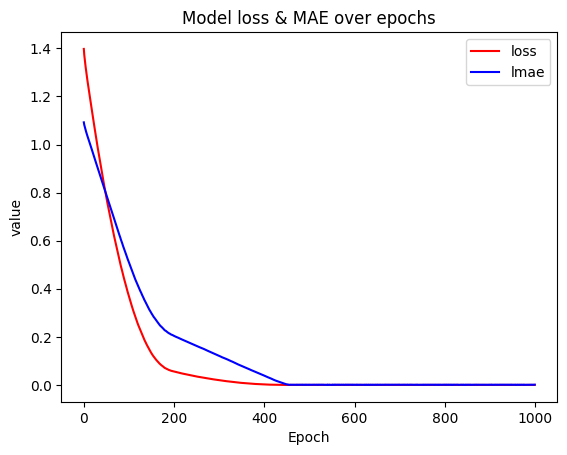

In [37]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='lmae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [40]:
# 7. 모댈 저장 및 사용
model.predict(np.array([[0],
                                       [0.01]]))

1/1 [==============================] - 0s 25ms/step


array([[0.3204114 ],
       [0.33841547]], dtype=float32)

In [39]:
model.save('model/after_learning.h5')

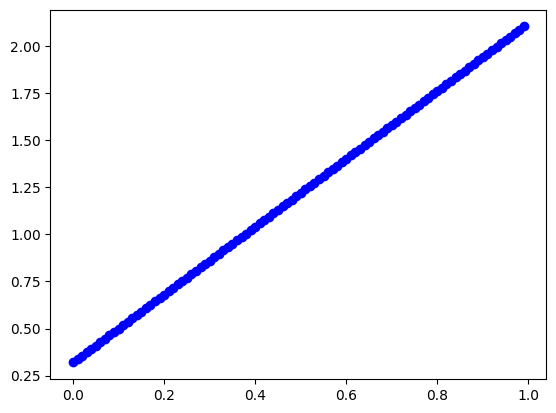

In [41]:
# 실제값
plt.scatter(x=scaled_data_C,
                   y=scaled_data_F,
                   c='b')
plt.show()

In [44]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat, scaled_data_F):
    print('예측값:{}, 실제값:{}, 오차:{}'.format(h,
                                                                   y,
                                                                    h[0]-y))

4/4 [==============================] - 0s 2ms/step
예측값:[0.3204114], 실제값:0.32, 오차:0.0004114139080047541
예측값:[0.33841547], 실제값:0.33799999999999997, 오차:0.000415473699569735
예측값:[0.35641953], 실제값:0.35600000000000004, 오차:0.0004195334911346049
예측값:[0.3744236], 실제값:0.374, 오차:0.00042359328269958585
예측값:[0.39242765], 실제값:0.392, 오차:0.00042765307426451127
예측값:[0.4104317], 실제값:0.41, 오차:0.0004317128658294922
예측값:[0.42843577], 실제값:0.428, 오차:0.0004357726573944176
예측값:[0.44643983], 실제값:0.446, 오차:0.00043983244895934304
예측값:[0.4644439], 실제값:0.46399999999999997, 오차:0.00044389224052432397
예측값:[0.48244795], 실제값:0.48200000000000004, 오차:0.0004479520320891939
예측값:[0.50045204], 실제값:0.5, 오차:0.0004520416259765625
예측값:[0.5184561], 실제값:0.518, 오차:0.0004561014175414879
예측값:[0.53646016], 실제값:0.536, 오차:0.00046016120910641334
예측값:[0.55446416], 실제값:0.554, 오차:0.00046416139602656337
예측값:[0.5724683], 실제값:0.5720000000000001, 오차:0.0004682807922362642
예측값:[0.59047234], 실제값:0.59, 오차:0.0004723405838013006
예측값:[0.6084764], 실제값:0

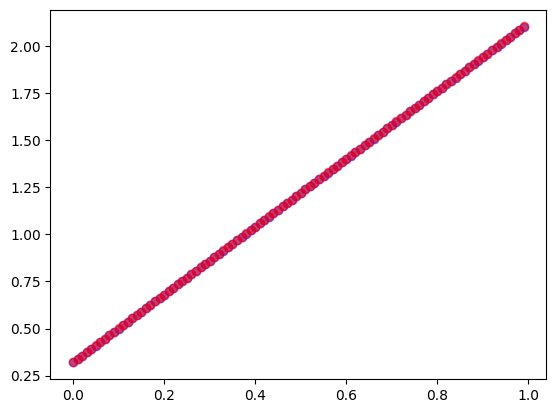

In [46]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5)
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)

## 2.2 노이즈가 있는 데이터로 실습

In [49]:
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100)   #  평균 0, 표준편차 0.1개, 100개 데이터
noised_scaled_data_f = scaled_data_F + noise

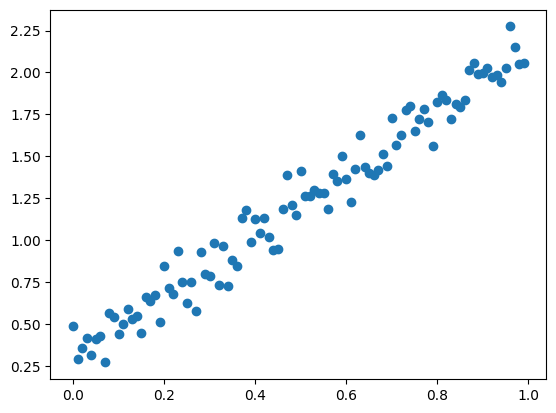

In [50]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_f)
plt.show()

In [54]:
# 3. 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [55]:
# 5. 모델학습
hist2 = model2.fit(scaled_data_C,scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3274 - mae: 1.3910
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2937 - mae: 1.3799
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2676 - mae: 1.3712
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.2474 - mae: 1.3644
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2282 - mae: 1.3579
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.2097 - mae: 1.3516
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.1924 - mae: 1.3457
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.1743 - mae: 1.3395
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.1592 - mae: 1.3344
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.1425 - mae: 1.3286
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 0.3356 - mae: 0.4737
Epoch 175/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3303 - mae: 0.4702
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3250 - mae: 0.4666
Epoch 177/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3201 - mae: 0.4632
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3149 - mae: 0.4596
Epoch 179/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3104 - mae: 0.4565
Epoch 180/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3057 - mae: 0.4532
Epoch 181/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3005 - mae: 0.4496
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2950 - mae: 0.4458
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2911 - mae: 0.4430
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0682 - mae: 0.2255
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0676 - mae: 0.2246
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0670 - mae: 0.2236
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0665 - mae: 0.2227
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0658 - mae: 0.2216
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0653 - mae: 0.2208
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0647 - mae: 0.2198
Epoch 353/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0642 - mae: 0.2189
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0636 - mae: 0.2180
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0630 - mae: 0.2170
Epoch 356/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 1ms/step - loss: 0.0094 - mae: 0.0839
Epoch 519/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0093 - mae: 0.0832
Epoch 520/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0091 - mae: 0.0822
Epoch 521/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0089 - mae: 0.0814
Epoch 522/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0087 - mae: 0.0805
Epoch 523/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0085 - mae: 0.0796
Epoch 524/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0083 - mae: 0.0787
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0081 - mae: 0.0778
Epoch 526/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0079 - mae: 0.0768
Epoch 527/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0078 - mae: 0.0762
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 6.5125e-07 - mae: 7.9189e-04
Epoch 684/1000
4/4 [==============================] - 0s 3ms/step - loss: 8.9885e-07 - mae: 9.0083e-04
Epoch 685/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8684e-07 - mae: 4.2408e-04
Epoch 686/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.2039e-07 - mae: 8.3121e-04
Epoch 687/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1328e-07 - mae: 8.2563e-04
Epoch 688/1000
4/4 [==============================] - 0s 3ms/step - loss: 6.6411e-07 - mae: 7.9470e-04
Epoch 689/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.1187e-07 - mae: 4.4619e-04
Epoch 690/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.5261e-07 - mae: 5.6925e-04
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.4609e-07 - mae: 8.3067e-04
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.5744e-07 - m

4/4 [==============================] - 0s 2ms/step - loss: 4.2107e-07 - mae: 6.1383e-04
Epoch 843/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.2806e-07 - mae: 6.2177e-04
Epoch 844/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.4111e-06 - mae: 0.0012
Epoch 845/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.2458e-07 - mae: 5.4622e-04
Epoch 846/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.9799e-07 - mae: 5.2388e-04
Epoch 847/1000
4/4 [==============================] - 0s 3ms/step - loss: 8.3704e-07 - mae: 8.8974e-04
Epoch 848/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.1399e-07 - mae: 7.0342e-04
Epoch 849/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.7909e-07 - mae: 6.8074e-04
Epoch 850/1000
4/4 [==============================] - 0s 2ms/step - loss: 9.5828e-07 - mae: 9.5106e-04
Epoch 851/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.3811e-07 - mae: 

4/4 [==============================] - 0s 2ms/step - loss: 5.5609e-07 - mae: 7.0895e-04
Epoch 923/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.6196e-07 - mae: 6.6146e-04
Epoch 924/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.3549e-07 - mae: 3.5796e-04
Epoch 925/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0391e-06 - mae: 9.9173e-04
Epoch 926/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.1924e-07 - mae: 4.5161e-04
Epoch 927/1000
4/4 [==============================] - 0s 2ms/step - loss: 9.0632e-07 - mae: 9.3370e-04
Epoch 928/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.4423e-07 - mae: 4.8270e-04
Epoch 929/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.1270e-07 - mae: 8.7532e-04
Epoch 930/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.2517e-07 - mae: 6.3642e-04
Epoch 931/1000
4/4 [==============================] - 0s 3ms/step - loss: 6.9608e-07 - m

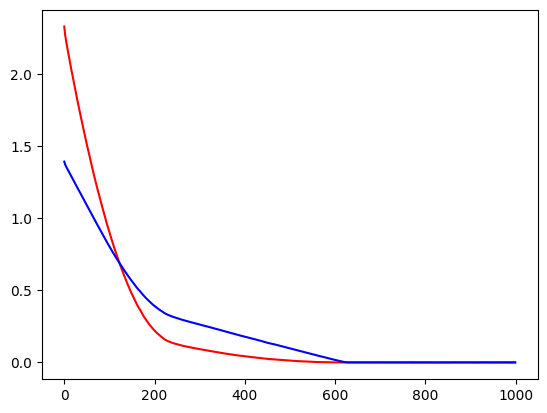

In [56]:
# 6. 학습된 모델 과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [64]:
model2.save('model/noise_after_learning.h5')

In [60]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [61]:
for h, y in zip(y_hat, noised_scaled_data_f):
    print('실제값 : {}, 에측값 : {}, 오차 : {}'.format(y,
                                                                          h,
                                                                          h[0]-y))

실제값 : 0.48905257038003563, 에측값 : [0.3206845], 오차 : -0.16836807779199242
실제값 : 0.2914062629459167, 에측값 : [0.33868855], 오차 : 0.04728228943369145
실제값 : 0.3592820163678585, 에측값 : [0.3566926], 오차 : -0.0025894041966854076
실제값 : 0.4147516282996508, 에측값 : [0.37469664], 오차 : -0.04005498613923514
실제값 : 0.31310769713742614, 에측값 : [0.3927007], 오차 : 0.07959300481455445
실제값 : 0.4102065572905948, 에측값 : [0.41070476], 오차 : 0.0004982044529507346
실제값 : 0.42791096141420687, 에측값 : [0.4287088], 오차 : 0.0007978303185812163
실제값 : 0.2705275693654579, 에측값 : [0.44671285], 오차 : 0.17618528215889512
실제값 : 0.5657658005663493, 에측값 : [0.4647169], 오차 : -0.10104888925043132
실제값 : 0.542049851591955, 에측값 : [0.48272097], 오차 : -0.059328880484472046
실제값 : 0.43745710260332404, 에측값 : [0.50072503], 오차 : 0.06326792829572381
실제값 : 0.5008451738804279, 에측값 : [0.5187291], 오차 : 0.017883916810184863
실제값 : 0.5865299374196752, 에측값 : [0.53673315], 오차 : -0.04979678693749745
실제값 : 0.5278643584808353, 에측값 : [0.55473715], 오차 : 0.0268727921882

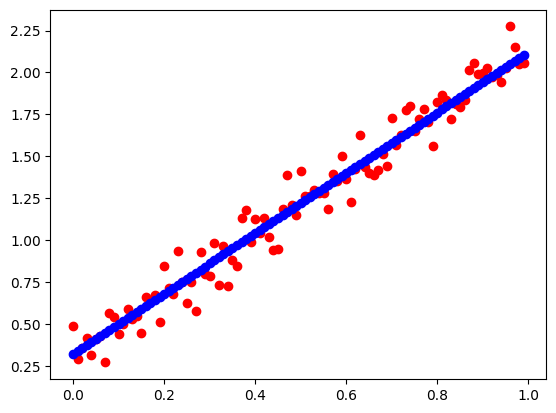

In [63]:
plt.scatter(x=scaled_data_C,
                   y= noised_scaled_data_f,
           c='r')
plt.scatter(x=scaled_data_C,
                   y=y_hat,
                   c='b')